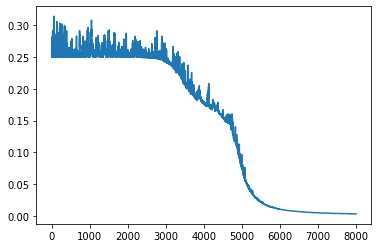

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 4; N_o = 2

# XOR input
# r_i = np.matrix('0 1 0 1; 0 0 1 1')
r_i = np.matrix('0 1 0 1; 0 0 1 1; 1 1 1 1')

# XOR output
# Two classes encoding
r_d = np.matrix('0 1 1 0; 1 0 0 1')


def mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.7, batch_size=1):

    # Initialize randomly the weights
    # Hidden layer
    w_h = np.random.rand(N_h+1,N_i) - 0.5
    # Output layer
    w_o=np.random.rand(N_o,N_h+1) - 0.5

    mse = []

    for ti in range(training_steps):
        # Select training pattern randomly
        #i = np.floor(4*np.random.rand()).astype('int')
        for bi in range(batch_size):
            # Feed-forward the input to hidden layer
            i = np.floor(np.shape(r_i)[1]*np.random.rand()).astype('int')
            r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
            r_h[-1] = 1  # Bias from hidden to output layer
            #r_h = np.concatenate((r_h, np.ones((1,1))), axis=0)
            # Feed-forward the input to the output layer
            r_o = 1 / (1 + np.exp(-w_o*r_h))
            # Calculate the network error
            d_o = np.multiply(np.multiply(r_o, 1-r_o), r_d[:,i] - r_o)
            # Calculate the responsability of the hidden network in the error
            d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))
            # Update weights
            w_o = w_o + lr*(r_h*d_o.T).T
            w_h = w_h + lr*(r_i[:,i]*d_h.T).T
            
        # Test all patterns
        #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
        rht = 1 / (1 + np.exp(-w_h*r_i))
        rht[-1] = 1
        r_o_test = 1 / (1 + np.exp(-w_o*rht))
        mse += [mean_squared_error(r_d, r_o_test)]
        
    return mse, r_o_test, w_h, w_o

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=8000, lr=0.7, batch_size=1)
plt.plot(result[0])

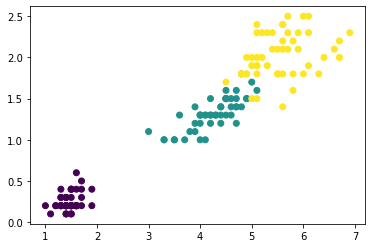

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Feature selection
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
obs = len(y)
test_size = 0.2  # 20% of data for testing, for 80% training

X_train = []
y_train = []
X_test = []
y_test = []
for clase in np.unique(y):
    i = np.where(y==clase)[0]
    np.random.shuffle(i)
    X_test += [X[i[40:]]]
    y_test += [y[i[40:]]]
    X_train += [X[i[:40]]]
    y_train += [y[i[:40]]]
X_test, y_test

([array([[1.4, 0.2],
         [1.2, 0.2],
         [1.5, 0.2],
         [1.4, 0.1],
         [1.6, 0.2],
         [1.4, 0.1],
         [1.4, 0.3],
         [1.3, 0.3],
         [1.6, 0.2],
         [1.4, 0.2]]),
  array([[4.1, 1.3],
         [4.4, 1.4],
         [4. , 1.3],
         [3.3, 1. ],
         [4.6, 1.4],
         [3.5, 1. ],
         [4.3, 1.3],
         [4.8, 1.8],
         [4.7, 1.4],
         [5.1, 1.6]]),
  array([[4.8, 1.8],
         [6.1, 1.9],
         [5.1, 1.5],
         [5.6, 2.4],
         [5.1, 2.4],
         [5.9, 2.1],
         [5.8, 1.8],
         [5.5, 1.8],
         [6.4, 2. ],
         [5.4, 2.3]])],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])])

In [ ]:
150*0.8, 150*0.2

(120.0, 30.0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
y_test

array([0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 2, 1, 2, 1, 2])

In [ ]:
one_hot_my_encoding = np.zeros((len(y_test), len(np.unique(y_test))))
for i,yi in enumerate(y_test):
    one_hot_my_encoding[i][yi] = 1 
one_hot_my_encoding[:10] 

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

mlp_encoding = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

X_train = np.concatenate((X_train, np.ones((120,1))), axis=1)

r_i = np.matrix(X_train.transpose())
r_d = np.matrix(mlp_encoding.transpose())

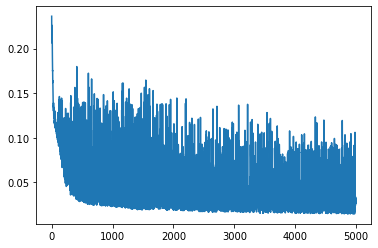

In [ ]:
N_i = 3; N_h = 2; N_o = 3

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)

plt.plot(result[0])

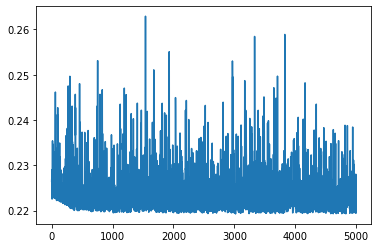

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = np.concatenate((X_train_scaled, np.ones((120,1))), axis=1)

r_i = np.matrix(X_train_scaled.transpose())
r_d = np.matrix(mlp_encoding.transpose())

N_i = 3; N_h = 2; N_o = 3

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)

plt.plot(result[0])

In [ ]:
r_i

matrix([[0.05172414, 0.5862069 , 0.63793103, 0.06896552, 0.5       ,
         0.67241379, 0.53448276, 0.68965517, 0.86206897, 0.96551724,
         0.94827586, 0.5862069 , 0.4137931 , 0.51724138, 0.5       ,
         0.0862069 , 0.06896552, 0.81034483, 0.75862069, 0.06896552,
         0.65517241, 0.0862069 , 0.9137931 , 0.0862069 , 0.44827586,
         0.77586207, 0.72413793, 0.0862069 , 0.65517241, 0.03448276,
         0.06896552, 0.5       , 0.60344828, 0.06896552, 0.74137931,
         0.74137931, 0.4137931 , 0.48275862, 0.79310345, 0.63793103,
         0.05172414, 0.62068966, 0.03448276, 0.86206897, 0.05172414,
         0.05172414, 0.68965517, 0.01724138, 0.03448276, 0.05172414,
         0.05172414, 0.43103448, 0.84482759, 0.5862069 , 0.05172414,
         0.68965517, 0.51724138, 0.77586207, 0.05172414, 0.68965517,
         0.03448276, 0.5       , 0.67241379, 0.13793103, 0.68965517,
         0.56896552, 0.96551724, 0.5862069 , 0.60344828, 0.72413793,
         0.06896552, 0.10344828, 0

<AxesSubplot:>

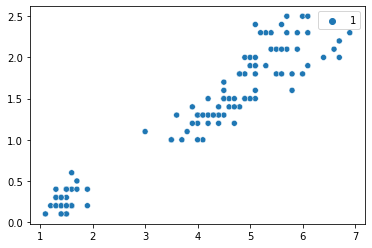

In [ ]:
import seaborn as sns
y_pred = [np.where(result[1].T[i] == result[1].T[i].max())[1][0] for i in range(len(y_train))]
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_pred, palette=sns.color_palette("tab10")[:1])

In [ ]:
r_d.T

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0

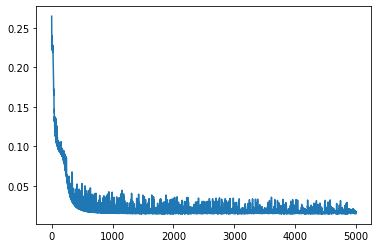

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Feature selection
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = np.concatenate((X_train_scaled, np.ones((120,1))), axis=1)
mlp_encoding = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
r_i = np.matrix(X_train_scaled.transpose())
r_d = np.matrix(mlp_encoding.transpose())

# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 2; N_o = 3

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.8, batch_size=10)
plt.plot(result[0])

<AxesSubplot:>

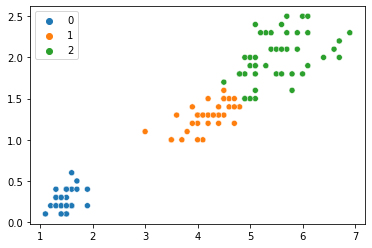

In [ ]:
y_pred = [np.where(result[1].T[i] == result[1].T[i].max())[1][0] for i in range(len(y_train))]
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_pred, palette=sns.color_palette("tab10")[:3])

<AxesSubplot:>

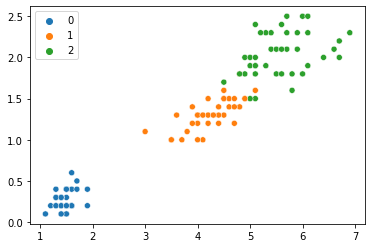

In [ ]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette=sns.color_palette("tab10")[:3])

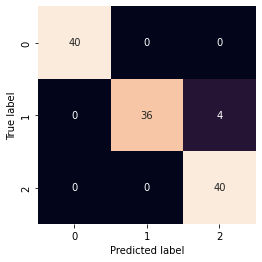

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.90      0.95        40
           2       0.91      1.00      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
np.diag(cm).sum() / cm.sum()

0.9666666666666667

Ver: 
- https://en.wikipedia.org/wiki/Precision_and_recall
- https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e

<AxesSubplot:>

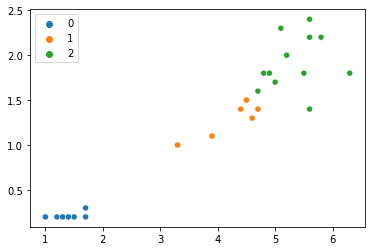

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.concatenate((X_test_scaled, np.ones((30,1))), axis=1)
r_i = np.matrix(X_test_scaled.transpose())

def mlp_predict(r_i, w_h, w_o):
    # Test all patterns
    #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    rht = 1 / (1 + np.exp(-w_h*r_i))
    rht[-1] = 1
    r_o_test = 1 / (1 + np.exp(-w_o*rht))
    return r_o_test

result_test = mlp_predict(r_i, result[2], result[3])
y_pred = [np.where(result_test.T[i] == result_test.T[i].max())[1][0] for i in range(len(y_test))]
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette=sns.color_palette("tab10")[:3])

<AxesSubplot:>

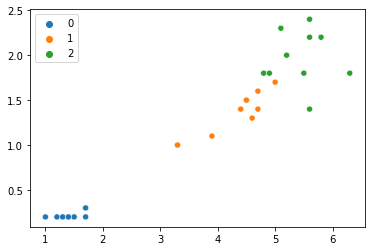

In [ ]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette=sns.color_palette("tab10")[:3])

In [ ]:
x_min, y_min = X.min(axis=0)
x_max, y_max = X.max(axis=0)
x_min, y_min, x_max, y_max

(1.0, 0.1, 6.9, 2.5)

In [ ]:
gX = np.linspace(x_min, x_max, 100)
gY = np.linspace(y_min, y_max, 100)

gData = np.concatenate((gX.reshape(-1,1), gY.reshape(-1,1)), axis=1)
gData_scaled = scaler.transform(gData)

gData_scaled = np.concatenate((gData_scaled, np.ones((100,1))), axis=1)
r_i = np.matrix(gData_scaled.transpose())

result_test = mlp_predict(r_i, result[2], result[3])
y_pred = [np.where(result_test.T[i] == result_test.T[i].max())[1][0] for i in range(100)]

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
                     
Xgd = gData_scaled[:,0]
Ygd = gData_scaled[:,1]

Z = []
for xi in Xgd:
    for yi in Ygd:
        z_result = mlp_predict(np.array([[xi, yi, 1]]).T, result[2], result[3])
        Z += [np.where(z_result == z_result.max())[0][0]]

<AxesSubplot:>

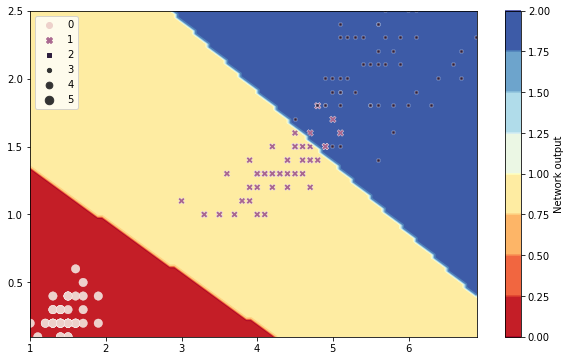

In [ ]:
plt.figure(figsize=(10,6))
Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)

sns.scatterplot(X[:,0], X[:,1], hue=y, style=y, size=5-y)

In [ ]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  0, 50]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>